# Challenge Set 4

### Challenge #1

In [10]:
import pandas as pd
import random
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from patsy import dmatrices
import scipy as sp
import statsmodels.api as sm
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [79]:
mu1, sigma1 = 10, 3 
mu2, sigma2 = 12, 2.5
beta_0 = 5
beta_1 = 4
beta_2 = 6.7
error = np.random.normal(mu2, sigma2, 1000)
x = np.random.normal(mu1, sigma1, 1000)
#log_x = [math.log(i) for i in x]
#param1 = np.random.uniform(0,20,1000)

y = [beta_0 + beta_1 * x[i] + error[i] for i in range(len(x))]
df = pd.DataFrame(y, columns = ['y'])
df['x'] = [x[i] for i in x]
df['error'] = [error[i] for i in error]
df['log_y'] = np.log(y)
df['log_x'] = np.log(x)
df['squared_x'] = df['x'].apply(lambda x: x**2)
squared_x = df['squared_x'].tolist()
df.head()


/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,y,x,error,log_y,log_x,squared_x
0,62.652432,6.608942,11.898075,4.137603,2.497114,43.678118
1,57.602533,14.830014,13.559287,4.053567,2.237878,219.929322
2,67.242073,8.542991,13.987815,4.208299,2.568632,72.982687
3,40.462446,8.900102,14.010459,3.700374,1.735014,79.211817
4,47.969164,10.026435,13.987815,3.870558,2.093308,100.529389


In [20]:
y, x = dmatrices('df["log_y"] ~ df["x"]')
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df["log_y"]   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     44.90
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           3.46e-11
Time:                        12:55:49   Log-Likelihood:                 45.607
No. Observations:                1000   AIC:                            -87.21
Df Residuals:                     998   BIC:                            -77.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.2453      0.035    121.683      0.000         4.177     4.314
df["x"]       -0.0223      0.003     -6.701      0.000        -0.029    -0.016
==============================================================================
Omnibus:                      249.862   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              771.528
Skew:                          -1.223   Prob(JB):                    2.92e-168
Kurtosis:                       6.540   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
y, x = dmatrices('df["log_y"] ~ df ["x"] + df["squared_x"]')
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df["log_y"]   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.984
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           5.09e-05
Time:                        14:35:40   Log-Likelihood:                 97.684
No. Observations:                1000   AIC:                            -189.4
Df Residuals:                     997   BIC:                            -174.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           4.3340      0.115     37.746      0.000         4.109     4.559
df["x"]            -0.0529      0.023     -2.343      0.019        -0.097    -0.009
df["squared_x"]     0.0019      0.001      1.886      0.060     -7.89e-05     0.004
==============================================================================
Omnibus:                      148.817   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.472
Skew:                          -0.914   Prob(JB):                     1.12e-59
Kurtosis:                       4.781   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Challenge 2

In [57]:
y, x = dmatrices('df["log_y"] ~ df["log_x"]')
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            df["log_y"]   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     9261.
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        13:19:33   Log-Likelihood:                 1207.5
No. Observations:                1000   AIC:                            -2411.
Df Residuals:                     998   BIC:                            -2401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.6930      0.014    193.482      0.000         2.666     2.720
df["log_x"]     0.5887      0.006     96.233      0.000         0.577     0.601
==============================================================================
Omnibus:                     1212.028   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           382061.960
Skew:                           5.694   Prob(JB):                         0.00
Kurtosis:                      98.078   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df['y_2'] = [beta_0 + beta_1 * x[t] + beta_2 * squared_x[t] + error[t] for t in range(len(error))]
df.head()

,y,x,error,log_y,log_x,squared_x,y_2
0,74.375141,10.691263,10.888197,4.309122,2.601249,114.303104,840.205939
1,52.001066,11.927431,8.283205,3.951264,2.152555,142.263611,1005.167259
2,46.222486,12.871142,12.155473,3.833466,1.895794,165.666306,1156.186735
3,36.752231,7.004561,11.408396,3.604199,1.704516,49.063870,365.480159
4,72.353768,6.928367,13.785674,4.281568,2.653071,48.002272,393.968990


In [35]:
x, y = dmatrices('df["y_2"] ~ df["x"]')
x_train, x_test, y_train, y_test = cv.train_test_split(y, x,test_size=0.25,random_state=1234)
model = LinearRegression().fit(x_train, y_train)
print(metrics.mean_squared_error(y_train,model.predict(x_train)))
print(metrics.mean_squared_error(y_test,model.predict(x_test)))

4322.43718206
3601.69088922


### Challenge 3 

In [26]:
df['constant'] = 1
df['cubed_x'] = df['x'].apply(lambda x: x**3)
df['fourth_x'] = df['x'].apply(lambda x: x**4)
df['fifth_x'] = df['x'].apply(lambda x: x**5)
df['sixth_x'] = df['x'].apply(lambda x: x**6)
df['seventh_x'] = df['x'].apply(lambda x: x**7)

In [27]:
test = df[int(len(df)*.75):]
train = df[:int(len(df)*.75)]
ols = LinearRegression()
train1 = sm.OLS(train['y_2'],train['constant']).fit()
print(len(train))

750


In [58]:
a, b = dmatrices('train["y_2"] ~ train["constant"]')
c, d = dmatrices('train["y_2"] ~ train["constant"]+train["x"]')
e, f = dmatrices('train["y_2"] ~ train["constant"]+train["x"]+train["squared_x"]')
g, h = dmatrices('train["y_2"] ~ train["constant"]+train["x"]+train["squared_x"]+train["cubed_x"]')
i, j = dmatrices('train["y_2"] ~ train["constant"]+train["x"]+train["squared_x"]+train["cubed_x"]+train["fourth_x"]')
k, l = dmatrices('train["y_2"] ~ train["constant"]+train["x"]+train["squared_x"]+train["cubed_x"]+train["fourth_x"]+train["fifth_x"]')
m, n = dmatrices('train["y_2"] ~ train["constant"]+train["x"]+train["squared_x"]+train["cubed_x"]+train["fourth_x"]+train["fifth_x"]+\
                    train["sixth_x"]')
o, p = dmatrices('train["y_2"] ~ train["constant"]+train["x"]+train["squared_x"]+train["cubed_x"]+train["fourth_x"]+train["fifth_x"]+\
                    train["sixth_x"]+train["seventh_x"]')

In [59]:
at, bt = dmatrices('test["y_2"] ~ test["constant"]')
ct, dt = dmatrices('test["y_2"] ~ test["constant"]+test["x"]')
et, ft = dmatrices('test["y_2"] ~ test["constant"]+test["x"]+test["squared_x"]')
gt, ht = dmatrices('test["y_2"] ~ test["constant"]+test["x"]+test["squared_x"]+test["cubed_x"]')
it, jt = dmatrices('test["y_2"] ~ test["constant"]+test["x"]+test["squared_x"]+test["cubed_x"]+test["fourth_x"]')
kt, lt = dmatrices('test["y_2"] ~ test["constant"]+test["x"]+test["squared_x"]+test["cubed_x"]+test["fourth_x"]+test["fifth_x"]')
mt, nt = dmatrices('test["y_2"] ~ test["constant"]+test["x"]+test["squared_x"]+test["cubed_x"]+test["fourth_x"]+test["fifth_x"]+\
                    test["sixth_x"]')
ot, pt = dmatrices('test["y_2"] ~ test["constant"]+test["x"]+test["squared_x"]+test["cubed_x"]+test["fourth_x"]+test["fifth_x"]+\
                    test["sixth_x"]+test["seventh_x"]')


In [60]:
ft1 = sm.OLS(a, b).fit()
ft2 = sm.OLS(c, d).fit()
ft3 = sm.OLS(e, f).fit()
ft4 = sm.OLS(g, h).fit()
ft5 = sm.OLS(i, j).fit()
ft6 = sm.OLS(k, l).fit()
ft7 = sm.OLS(m, n).fit()
ft8 = sm.OLS(o, p).fit()

In [61]:
gt1 = sm.OLS(at, bt).fit()
gt2 = sm.OLS(ct, dt).fit()
gt3 = sm.OLS(et, ft).fit()
gt4 = sm.OLS(gt, ht).fit()
gt5 = sm.OLS(it, jt).fit()
gt6 = sm.OLS(kt, lt).fit()
gt7 = sm.OLS(mt, nt).fit()
gt8 = sm.OLS(ot, pt).fit()

In [62]:
train_list = [ft1, ft2, ft3, ft4, ft5, ft6, ft7, ft8]
test_list = [gt1, gt2, gt3, gt4, gt5, gt6, gt7, gt8]
train_mse = []
test_mse = []
aic_list = []
r_sq = []

for i in train_list:
    mse_res = i.mse_resid
    #print(mse_res)
    train_mse.append(mse_res)
    
for i in test_list:
    mse_res = i.mse_resid
    #print(mse_res)
    test_mse.append(mse_res)

for i in train_list:
    aic = i.aic
    #print(aic)
    aic_list.append(aic)

for i in train_list:
    r = i.rsquared
    #print(r)
    r_sq.append(r)

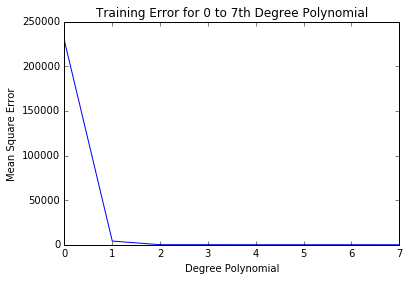

In [63]:
plt.plot(range(8), train_mse)
plt.title('Training Error for 0 to 7th Degree Polynomial')
plt.xlabel('Degree Polynomial')
plt.ylabel('Mean Square Error')


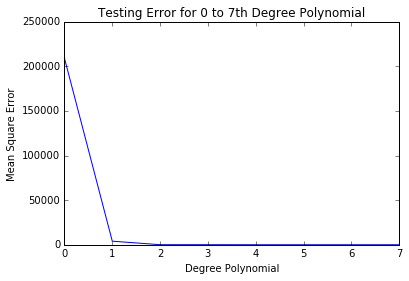

In [64]:
plt.plot(range(8), test_mse)
plt.title('Testing Error for 0 to 7th Degree Polynomial')
plt.xlabel('Degree Polynomial')
plt.ylabel('Mean Square Error')

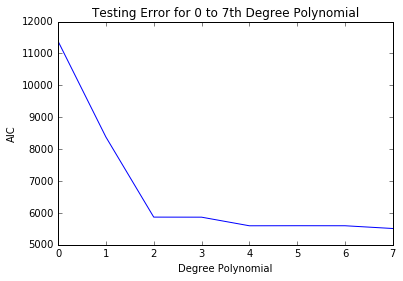

In [65]:
plt.plot(range(8), aic_list)
plt.title('Testing Error for 0 to 7th Degree Polynomial')
plt.xlabel('Degree Polynomial')
plt.ylabel('AIC')

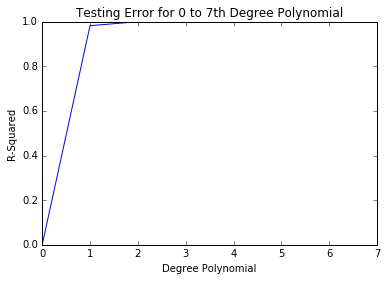

In [66]:
plt.plot(range(8), r_sq)
plt.title('Testing Error for 0 to 7th Degree Polynomial')
plt.xlabel('Degree Polynomial')
plt.ylabel('R-Squared')

### Challenge 4

In [67]:
test_pred = test['y_2'].tolist()
test_param = test['x'].tolist()
train_pred = train['y_2'].tolist()
train_param = train['x'].tolist()

In [68]:
m = []
train_err = []
test_err = []

for rows in range(1, 51):
    i = rows * 5
    m.append(i)
    tr = sm.OLS(train_pred[:i],train_param[:i]).fit()
    train_err.append(tr.mse_resid)
    te = sm.OLS(test_pred[:i], test_param[:i]).fit()
    test_err.append(te.mse_resid)

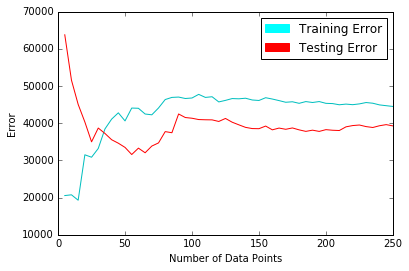

In [78]:
import matplotlib.patches as mpatches

plt.plot(m, train_err, 'c-')
plt.plot(m, test_err, 'r-')

plt.xlabel('Number of Data Points')
plt.ylabel('Error')

cyan = mpatches.Patch(color='cyan', label='Training Error')
red = mpatches.Patch(color='red', label='Testing Error')
plt.legend(handles=[cyan, red])

plt.show()